In [ ]:
# Drive mount
import os
colab=1
if colab==1:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  current_folder='Colab Notebooks/Capstone'

  dest_folder='/content/drive/My Drive/'+current_folder
  os.chdir(dest_folder)
  print('\n Current path: ' + os.getcwd())

Mounted at /content/drive

 Current path: /content/drive/My Drive/Colab Notebooks/Capstone


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import dataset
df = pd.read_csv('tb_drug_data_minmax.csv')
df.head()

,Recurrent,Gender,Age,Residence time,Nationality,Occupation,Education,Revenue,No. families,Tb in family,...,Sympomless,Have similar sym before,X-ray checking,Sputum specimen,Tb diagnosed,Clinical record checked,Anti-tb drug time,Patient final type decided,Subserotype type,TB Type
0,0.0,0.0,0.061728,0.164835,0.0,9.0,3.0,3.0,0.230769,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.125,1.0,0.0,3.0
1,0.0,0.0,0.160494,0.208791,0.0,0.0,2.0,0.0,0.307692,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,0.0,0.0,0.0
2,0.0,0.0,0.506173,0.560440,0.0,0.0,2.0,0.0,0.384615,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.000,0.0,0.0,3.0
3,0.0,0.0,0.765432,0.791209,0.0,0.0,0.0,1.0,0.230769,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,0.0,3.0
4,0.0,0.0,0.567901,0.615385,0.0,0.0,3.0,1.0,0.384615,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.000,0.0,0.0,3.0


In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Separate class
X = df.drop('TB Type', axis=1)
y = df['TB Type']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Without Sampling

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6601307189542484

Classification Report:
               precision    recall  f1-score   support

         0.0       0.08      0.02      0.03        52
         1.0       0.00      0.00      0.00        21
         2.0       0.00      0.00      0.00        21
         3.0       0.69      0.95      0.80       212

    accuracy                           0.66       306
   macro avg       0.19      0.24      0.21       306
weighted avg       0.49      0.66      0.56       306



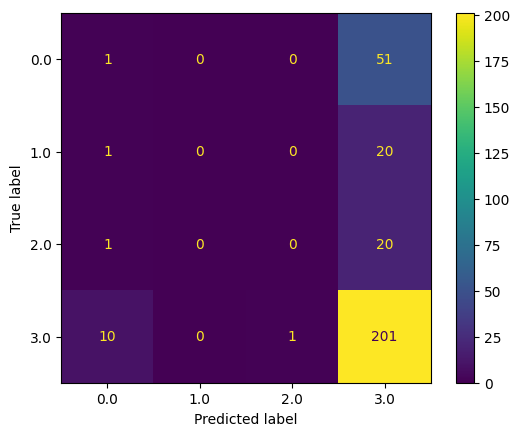

In [ ]:
# Train and test random forest classifier on non-sampled data for control case
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
disp.plot()
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)


### Random Undersampling

Accuracy: 0.26143790849673204

Classification Report:
               precision    recall  f1-score   support

         0.0       0.19      0.31      0.24        52
         1.0       0.03      0.10      0.05        21
         2.0       0.08      0.29      0.12        21
         3.0       0.66      0.26      0.38       212

    accuracy                           0.26       306
   macro avg       0.24      0.24      0.20       306
weighted avg       0.50      0.26      0.31       306



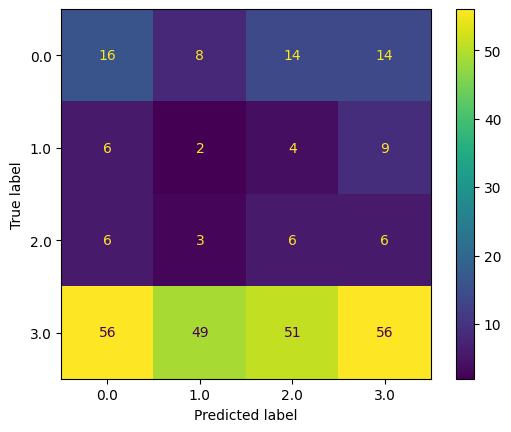

In [ ]:
# Resample dataset with random undersampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Test resampling performance with random sampler
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

# print results
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
disp.plot()
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)

### Tomek Links

Accuracy: 0.9281045751633987

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.69      0.82        52
         1.0       0.95      1.00      0.98        21
         2.0       1.00      0.76      0.86        21
         3.0       0.91      1.00      0.95       212

    accuracy                           0.93       306
   macro avg       0.97      0.86      0.90       306
weighted avg       0.93      0.93      0.92       306



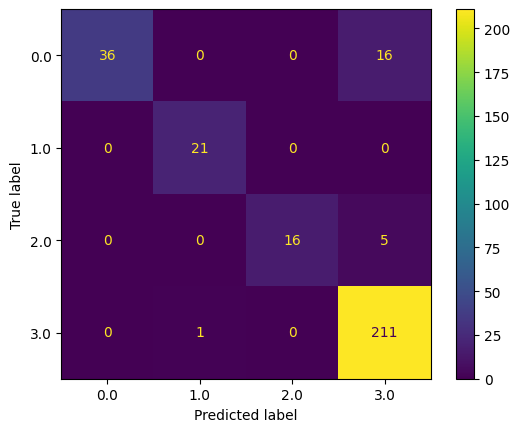

In [ ]:
# Resample dataset with tomek links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X, y)

# Test resampling performance with random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

# print results
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
disp.plot()
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)

### Near Miss

Accuracy: 0.32679738562091504

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.58      0.46        52
         1.0       0.23      1.00      0.37        21
         2.0       0.17      0.86      0.29        21
         3.0       1.00      0.15      0.26       212

    accuracy                           0.33       306
   macro avg       0.45      0.65      0.34       306
weighted avg       0.78      0.33      0.30       306



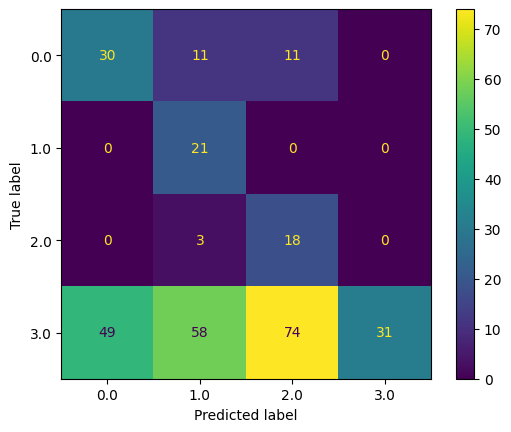

In [ ]:
# Resample dataset with near miss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

# Test performance with random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

# print results
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
disp.plot()
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)